## OBJECT DETECTION WITH TEMPLATES

1. Need a source image and a template image.

2. The template image T is slided over the source image (as in 2D convolution), 
and the program tries to find matches using statistics.

3. Several comparison methods are implemented in OpenCV. It returns a grayscale image, where each pixel denotes how much does the neighbourhood of that pixel match with template.

4. Use cv2.minMaxLoc() function to find where is the maximum/minimum value. Take it as the top-left corner of the rectangle and take (w,h) as width and height of the rectangle. 

That rectangle can be drawn on the region of matched template.


### Reference 
https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
cd ../gdrive/My Drive/Colab Notebooks/_Image Processing/images_data

/gdrive/My Drive/Colab Notebooks/_Image Processing/images_data


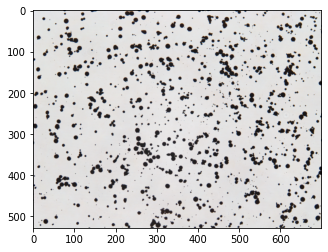

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('Ti_powder.tif')
plt.imshow(img_rgb)

In [ ]:
img_rgb.shape # 2d color image

(528, 700, 3)

In [ ]:
# convert into Gray for matching 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

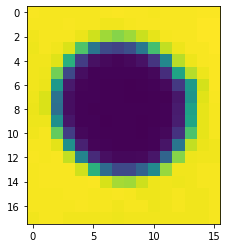

In [ ]:
# Template image for matching 
template = cv2.imread('Ti_powder_single.tif', 0)
plt.imshow(template)

In [ ]:
h, w = template.shape[::] 

Methods - 

1. ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

2. For TM_SQDIFF, Good match yields minimum value; bad match yields large values

3. For all others it is exactly opposite, max value = good fit.

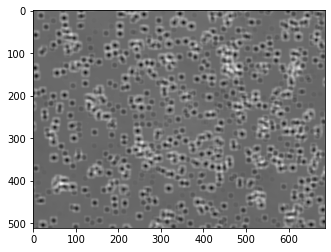

In [ ]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_SQDIFF)
plt.imshow(res, cmap='gray')

In [ ]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF

bottom_right = (top_left[0] + w, top_left[1] + h)

In [ ]:
cv2.rectangle(img_gray, top_left, bottom_right, 0, 1)  #Black (0) rectangle with thickness of 1 pixel. 

array([[228, 228, 228, ..., 228, 228, 228],
       [229, 228, 228, ..., 229, 228, 230],
       [231, 230, 230, ..., 229, 229, 230],
       ...,
       [225, 224, 225, ..., 222, 222, 222],
       [224, 224, 224, ..., 223, 222, 222],
       [224, 224, 225, ..., 223, 223, 223]], dtype=uint8)

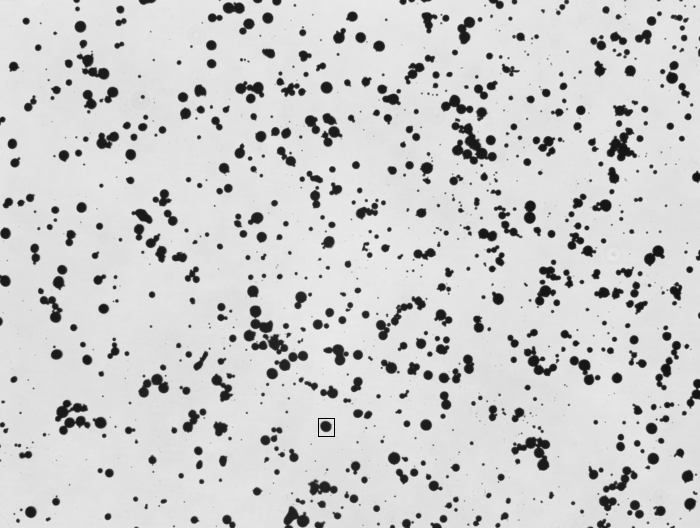

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img_gray)

#### Multiple Template Matching

For multiple occurances, cv2.minMaxLoc() won’t give all the locations...
So we need to set a threshold

In [ ]:
img_rgb = cv2.imread('Ti_powder.tif')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('Ti_powder_single.tif',0)
h, w = template.shape[::]

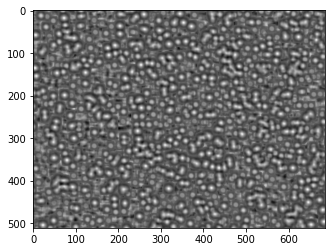

In [ ]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

In [ ]:
threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where(res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

In [ ]:
# zip fucntion to pair values of X and Y. 

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 1)  #Red rectangles with thickness 2. 


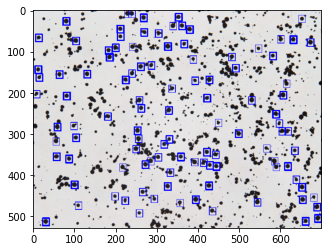

In [ ]:
plt.imshow(img_rgb)